In [1]:
import hdbscan
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import arff
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
import time


data=arff.loadarff(open('./artificial/disk-5000n.arff','r'))
data2=np.loadtxt('./dataset_part2/h.data')
print(data2)

listX = []
listY=[]
for point in data[0]:
    listX.append(point[0])
    listY.append(point[1])

#transformation en np.array()
X = []
for point in data[0]:
    X.append([point[0],point[1]])
X=np.array(X)



[[-6.327400e-02  2.773400e-02  2.268300e-02]
 [-7.310000e-04  4.821100e-02  6.919800e-02]
 [-6.076700e-02 -9.080000e-03  5.308500e-02]
 [ 1.325200e-02 -1.187600e-02  5.532400e-02]
 [-5.450800e-02 -3.813000e-03  1.738000e-03]
 [ 2.418000e-02  6.827500e-02  3.346200e-02]
 [-2.930800e-02  5.984900e-02 -6.326000e-02]
 [-1.645300e-02  1.388100e-02 -1.323600e-02]
 [-4.236100e-02 -5.994200e-02 -2.648700e-02]
 [-1.631000e-02 -3.661200e-02  4.792800e-02]
 [ 3.536000e-02 -4.495000e-02  4.147400e-02]
 [-2.870000e-04 -4.949600e-02 -6.343000e-02]
 [-6.593100e-02 -5.381000e-03 -6.489900e-02]
 [ 9.049000e-03  2.797600e-02  1.198000e-02]
 [-5.335000e-03  6.259200e-02 -5.750700e-02]
 [-4.175000e-03  6.464600e-02  4.085600e-02]
 [ 9.102400e-02 -3.144600e-02 -1.477400e-02]
 [-7.706800e-02 -3.532400e-02 -3.906000e-02]
 [ 5.515000e-02 -7.045000e-03  7.849500e-02]
 [-3.377900e-02  4.906600e-02  2.695800e-02]
 [ 4.495400e-02 -3.371600e-02  1.189400e-02]
 [ 8.785000e-03  1.689500e-02 -9.079000e-02]
 [-6.16550

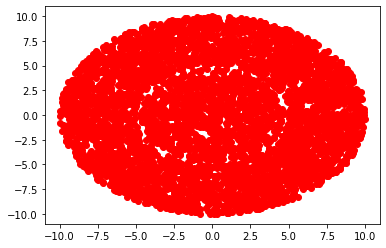

In [2]:
#affichages des datas
plt.plot(listX,listY, 'ro')
plt.show()

score: 0.3572443490197291


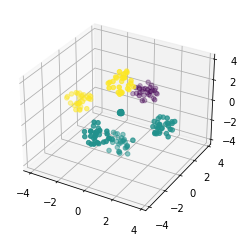

In [3]:
#méthode k-means
kmeans = KMeans(n_clusters=3, random_state=0).fit_predict(data2)
figure=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(data2[:,0], data2[:,1], data2[:,2], c=kmeans)
print("score:",metrics.silhouette_score(data2, kmeans, metric='euclidean'))

métrique: 0.7019231989948802
nombre de cluster: 7
temps: 0.22101140022277832


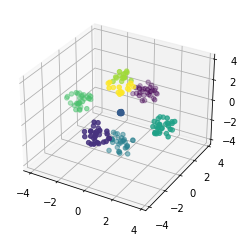

In [4]:
#variation des paramètres et calculs du score sur kMeans
find = False
nb_cluster = 2
metric_best = 0
limit=20
iteration = 0
start=time.time()
#on s'arrête quand notre score n'est plus améliorée
while(not find & (iteration < limit)):
    kmeans = KMeans(n_clusters=nb_cluster, random_state=0).fit_predict(data2)
    find_metric = metrics.silhouette_score(data2, kmeans, metric='euclidean')
    if find_metric > metric_best:
        metric_best=find_metric
        nb_cluster+=1
        best_kmeans = kmeans
    else:
        find=True
    iteration+=1
end=time.time()   
#plt.subplot(221)
#plt.scatter(X[:, 0], X[:, 1], c=best_kmeans)
figure=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(data2[:,0], data2[:,1], data2[:,2], c=kmeans)
print("métrique:",metric_best)
print("nombre de cluster:",nb_cluster-1)
print("temps:", end-start)

score: 0.26212557888628196


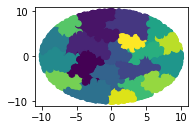

In [5]:
#méthode agglomerate-clustering
clustering = AgglomerativeClustering(n_clusters=20,linkage='complete').fit_predict(X)
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=clustering)
print("score:",metrics.silhouette_score(X, clustering, metric='euclidean'))

métrique: 0.7019231989948802
nombre de cluster: 7
temps: 0.03225421905517578


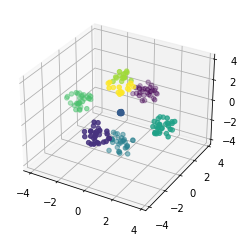

In [6]:
#variation des paramètres et calculs du score sur clustering-agglomerate
find = False
nb_cluster = 2 #on commence à deux clusters ou le calcul du score ne fonctionne pas
metric_best = -1
start=time.time()

#on s'arrête quand notre score n'est plus améliorée
while(not find):
    clustering = AgglomerativeClustering(n_clusters=nb_cluster,linkage='complete').fit_predict(data2)
    find_metric = metrics.silhouette_score(data2, clustering, metric='euclidean')
    if find_metric > metric_best:
        metric_best=find_metric
        nb_cluster+=1
        best_clustering = clustering
    else:
        find=True
    iteration+=1
end=time.time()

figure=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(data2[:,0], data2[:,1], data2[:,2], c=kmeans)
print("métrique:",metric_best)
print("nombre de cluster:",nb_cluster-1)
print("temps:", end-start)


score: -0.08974942096497229


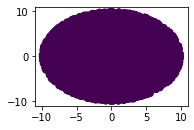

In [7]:
#méthode DBSCAN
clustering = DBSCAN(eps=0.05, min_samples=4).fit_predict(X)
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=clustering)
print("score:",metrics.silhouette_score(X, clustering, metric='euclidean'))

métrique: -0.09425773312093307
nombre de cluster: 7
temps: 0.06894397735595703


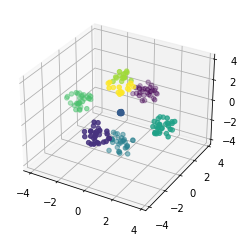

In [8]:
#variation des paramètres et calculs du score sur DBSCAN
find_eps = False
metric_best = -1
eps_max = 0.06

start=time.time()
#on s'arrête quand notre score n'est plus améliorée
while(not find_eps and (eps_max>0.0)):
    clustering = DBSCAN(eps=eps_max, min_samples=4).fit(X)
    n_clusters = len(set(clustering.labels_))
    #check du nombre de cluster pour le calcul du score
    if(n_clusters !=1):
        clustering_to_plot = DBSCAN(eps=eps_max, min_samples=4).fit_predict(data2)
        find_metric = metrics.silhouette_score(data2, clustering_to_plot, metric='euclidean')
        if find_metric > metric_best:
            metric_best=find_metric
            best_clustering = clustering_to_plot
            eps_max = eps_max-0.01
        else:
            find_eps=True
    else:
        eps_max=eps_max-0.01

end=time.time()

figure=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(data2[:,0], data2[:,1], data2[:,2], c=kmeans)
print("métrique:",metric_best)
print("nombre de cluster:",nb_cluster-1)
print("temps:", end-start)


score: 0.010015400396754748


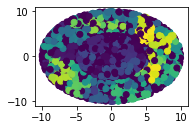

In [14]:
#méthode HDBSCAN
clustering = hdbscan.HDBSCAN(min_cluster_size=3).fit_predict(X)
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=clustering)
print("score:",metrics.silhouette_score(X, clustering, metric='euclidean'))

In [ ]:
#variation des paramètres et calculs du score sur HDBSCAN
find_best = False
metric_best = -1
cluster_size_min = 2

start=time.time()
#on s'arrête quand notre score n'est plus améliorée
while(cluster_size_min < len(X)): 
    clustering = hdbscan.HDBSCAN(min_samples=cluster_size_min).fit_predict(X)
    find_metric = metrics.silhouette_score(X, clustering, metric='euclidean')
    #print(find_metric, metric_best, find_metric > metric_best, cluster_size_min)
    if find_metric >= metric_best:
        metric_best=find_metric
        best_clustering = clustering
    cluster_size_min = cluster_size_min + 1
        

end=time.time()

figure=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(data2[:,0], data2[:,1], data2[:,2], c=kmeans)
print("métrique:",metric_best)
print("Taille minimale du cluster:",cluster_size_min)
print("temps:", end-start)